In [1]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#LOAD DATA
start=pd.read_csv('50_Startups.csv')
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
start.columns=['RnDspend', 'Administration','Marketingspend','State','Profit']


In [4]:
start

,RnDspend,Administration,Marketingspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnDspend        50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketingspend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
start.corr()

,RnDspend,Administration,Marketingspend,Profit
RnDspend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketingspend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


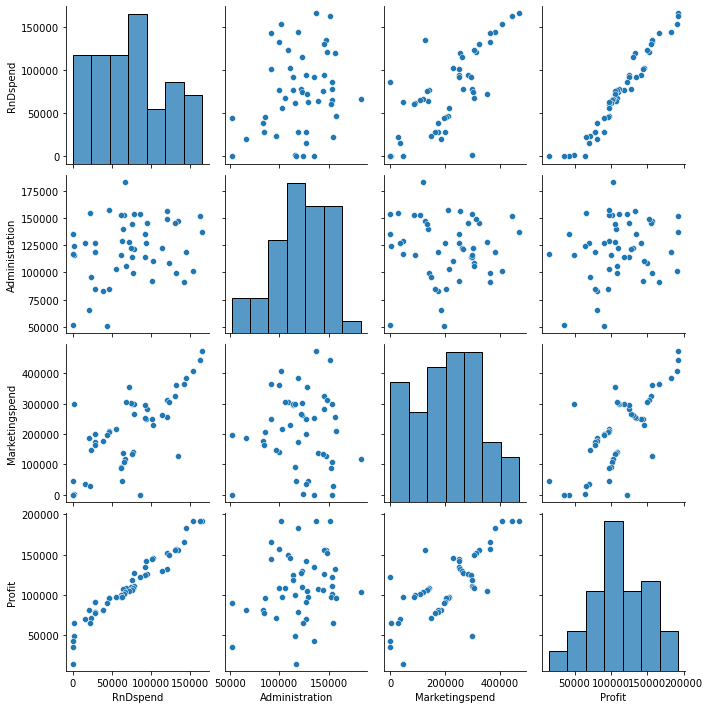

In [7]:
#Scatterplot between variables along with histograms:
pairplot=sns.pairplot(start)


In [8]:
import statsmodels.formula.api as smf
model=smf.ols("Profit~RnDspend+ Administration+ Marketingspend",data=start).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           4.53e-30
Time:                        04:56:16   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnDspend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketingspend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# Simple Linear Regression:
Simple_Administration=smf.ols('Profit~Administration',data=start).fit()

In [11]:
Simple_Administration.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 01 Jun 2021   Prob (F-statistic):              0.162
Time:                        04:56:16   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
Simple_Marketingspend=smf.ols('Profit~Marketingspend',data=start).fit()

In [13]:
Simple_Marketingspend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           4.38e-10
Time:                        04:56:16   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketingspend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Simple Regression model with Administration and Marketingspend:
Simple_Admk=smf.ols('Profit~Administration+Marketingspend',data=start).fit()

In [15]:
Simple_Admk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           2.50e-10
Time:                        04:56:17   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
Marketingspend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#Calculating VIF(variance inflation factor)

rsq_Rd=smf.ols('RnDspend~Administration+Marketingspend',data=start).fit().rsquared
vif_Rd=1/(1-rsq_Rd)

rsq_Ad=smf.ols('Administration~RnDspend+Marketingspend',data=start).fit().rsquared
vif_Ad=1/(1-rsq_Ad)

rsq_Mk=smf.ols('Marketingspend~Administration+RnDspend',data=start).fit().rsquared
vif_Mk=1/(1-rsq_Mk)

#sorting vif values in data frame
d1={'Variables':['RnDspend','Adminstration','Marketingspend'],'VIF':['vif_Rd','vif_Ad','vif_Mk']}
Vif_frame=pd.DataFrame(d1)

In [17]:
#Check residual analysis:
import statsmodels.api as sm

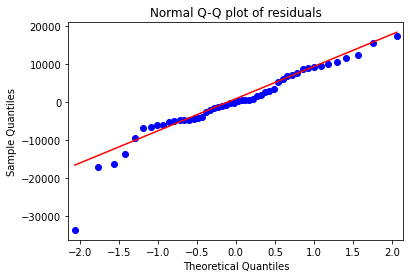

In [18]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [20]:
#Residual plot for homoscedascity:

def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

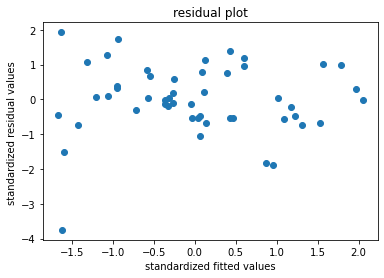

In [21]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values ')
plt.title('residual plot')
plt.show()

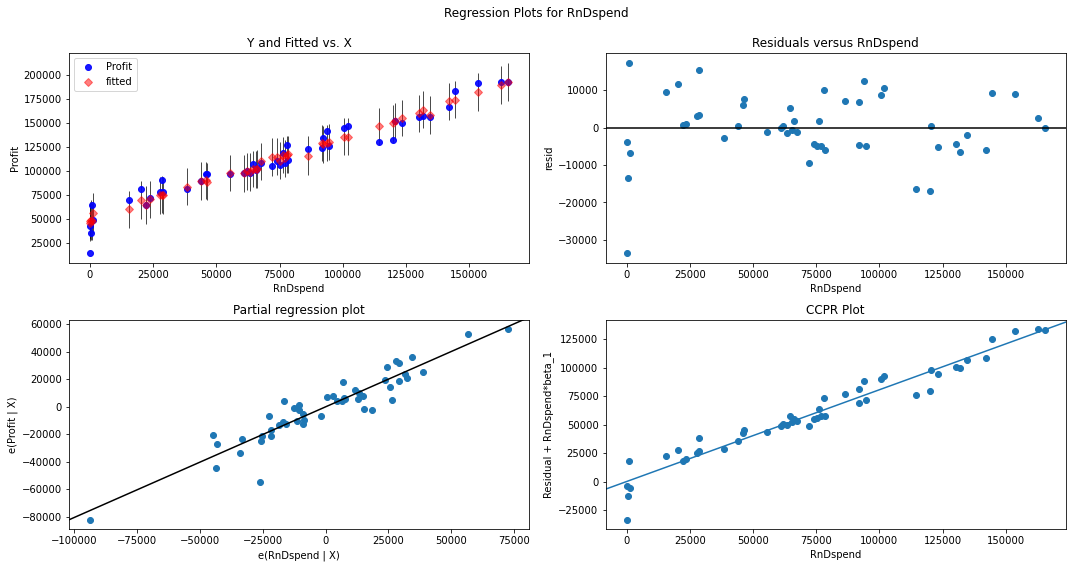

In [22]:
#Residual vs regression(Residual of each x values):
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'RnDspend',fig=fig)

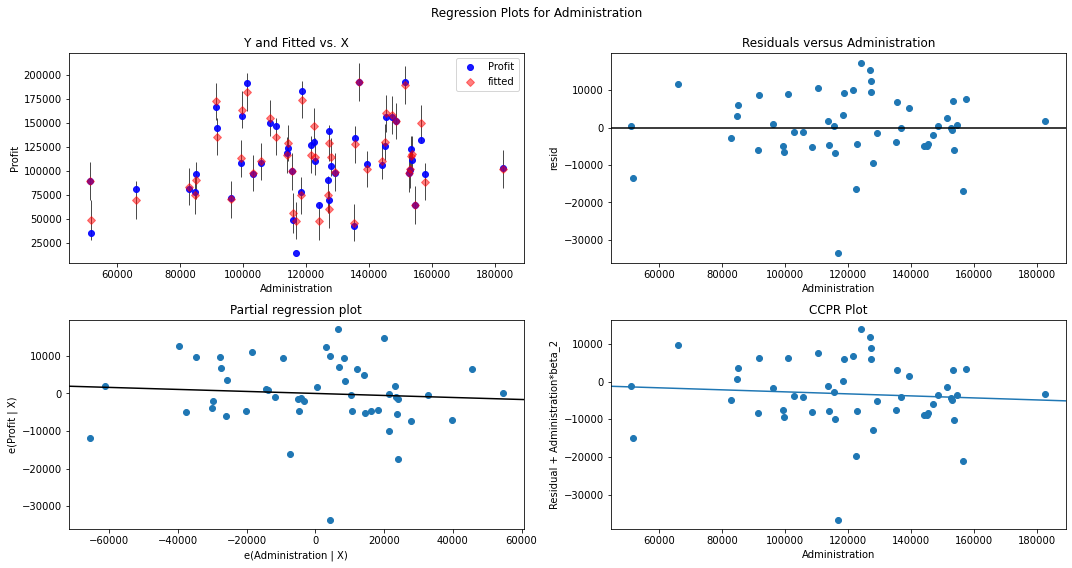

In [23]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Administration',fig=fig)

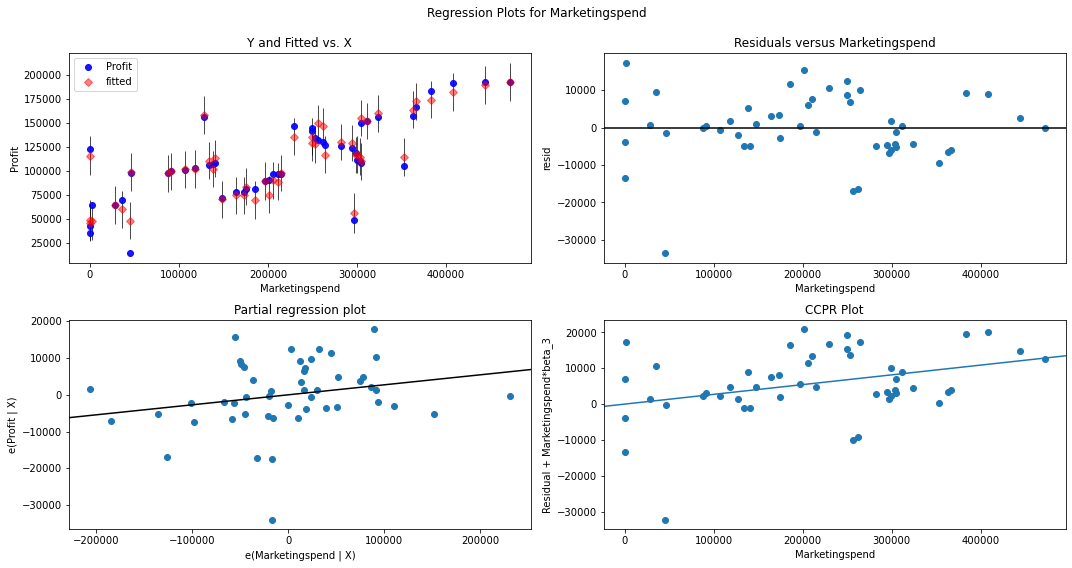

In [24]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Marketingspend',fig=fig)

In [25]:
#Cook's Distance:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

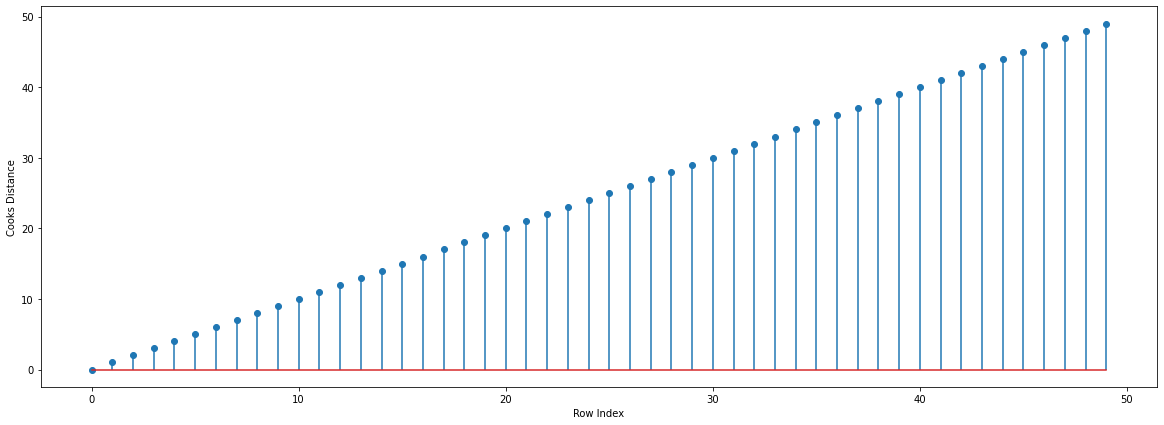

In [26]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(start))),np.around(c,3)
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

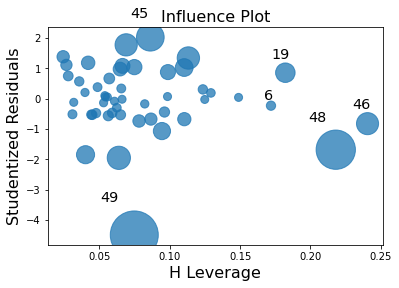

In [28]:
#High Influence Point:
influence_plot(model)
plt.show()

In [29]:
start.shape

(50, 5)

In [30]:
#Cut off value:
k=start.shape[1]
n=start.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.36

In [31]:
start[start.index.isin([46])]

,RnDspend,Administration,Marketingspend,State,Profit
46,1315.46,115816.21,297114.46,Florida,49490.75


In [32]:
start.head()

,RnDspend,Administration,Marketingspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [33]:
#Improving Model:
start_new=pd.read_csv('50_Startups.csv')
start_new.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [34]:
start_new.columns=['RnDspend', 'Administration','Marketingspend','State','Profit']

In [43]:
start_new

,RnDspend,Administration,Marketingspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [36]:
Start_news=start_new.drop(start_new.index[[46]],axis=0).reset_index()


In [37]:
#Drop orginal index
start1=Start_news.drop(['index'],axis=1)
start1

,RnDspend,Administration,Marketingspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [38]:
start1.shape

(49, 5)

In [39]:
#Build model:
Final=smf.ols('Profit~RnDspend+Marketingspend',data=start1).fit()
    

In [40]:
Final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     425.9
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           2.09e-30
Time:                        04:56:25   Log-Likelihood:                -515.08
No. Observations:                  49   AIC:                             1036.
Df Residuals:                      46   BIC:                             1042.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.723e+04   2709.323     17.433      0.000    4.18e+04    5.27e+04
RnDspend           0.7781      0.046     16.877      0.000       0.685       0.871
Marketingspend     0.0360      0.017      2.128      0.039       0.002       0.070
==============================================================================
Omnibus:                       16.463   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.210
Skew:                          -1.037   Prob(JB):                     3.36e-06
Kurtosis:                       5.837   Cond. No.                     5.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
(Final.rsquared,Final.aic)

(0.9487663303262085, 1036.158013539212)

In [44]:
#Prediction:

pred_y=Final.predict(start_new)

In [45]:
pred_y

0     192896.686542
1     189750.521907
2     181329.722389
3     173381.486578
4     171005.099712
5     162925.698126
6     156579.745457
7     160291.905799
8     152259.094480
9     154192.729786
10    134791.399096
11    134567.722473
12    129273.755475
13    127919.529292
14    149806.472552
15    145779.261111
16    117463.513235
17    131071.167254
18    129253.524696
19    114475.093626
20    117331.815939
21    119032.183233
22    115741.683195
23    110765.906411
24    112247.602237
25    102521.247658
26    110677.859831
27    116071.043575
28    102886.012342
29    102142.057692
30     98755.335241
31     97982.645832
32     98231.971620
33     98149.565768
34     90955.629366
35     90444.676797
36     76786.358659
37     88626.024604
38     69652.026939
39     83543.468101
40     75835.512250
41     74865.150411
42     70963.009864
43     60578.753528
44     65510.630568
45     48079.849171
46     58967.256058
47     47232.946707
48     47654.709403
49     48861.403469
